In [1]:
import csv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from nltk.metrics import BigramAssocMeasures
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [2]:
# first column is the review content (quoted)
# second column is the assigned sentiment (positive or negative)
def load_file():
    with open('D:\MS research\submissions\code\data/labelled_tweets_balanced.csv',encoding="utf8") as csv_file:
        reader = csv.reader(csv_file,delimiter=",",quotechar='"')
        next(reader)
        data =[]
        target = []
        for row in reader:
            # skip missing data
            if row[0] and row[1]:
                data.append(row[0])
                target.append(row[1])

        return data,target

In [3]:
data, target = load_file()
print(data[0],target[0])

construction  future economic zones fuels position  cpec opponents tht declare tht it  nt linking f economic hubs  corridorcont 1


In [4]:
# preprocess creates the term frequency matrix for the review data set
def preprocess_test(data):
    dat = data
    count_vectorizer = CountVectorizer(min_df=1,binary='false',ngram_range=(1,2))
    dat = count_vectorizer.fit_transform(dat)
    tfidf_data = TfidfTransformer(use_idf=False).transform(dat)

    return tfidf_data

In [5]:
# preprocess creates the term frequency matrix for the review data set
def preprocess_tfidf(n):
    data,target = load_file()
    count_vectorizer = CountVectorizer(max_df=0.8,binary='true',ngram_range=(1,n))#,analyzer =text_process)
    data = count_vectorizer.fit_transform(data)
    tfidf_data = TfidfTransformer(use_idf=False).fit_transform(data)

    return tfidf_data

In [6]:
# preprocess creates the term frequency matrix for the review data set
def preprocess_bow(n):
    dat,target = load_file()
    count_vectorizer = CountVectorizer(max_df=0.8,binary='false',ngram_range=(1,n))
    dat = count_vectorizer.fit_transform(dat)
    #tfidf_data = TfidfTransformer(use_idf=False).fit_transform(data)

    return dat

In [7]:
def learn_model(data,target,classifier):
    data_train, target_train = data, target
    predicted = cross_val_predict(classifier,data_train, target_train, cv=10)
    #print(classification_report(target,predicted))
    evaluate_model(target_train,predicted)
    scores = cross_val_score(classifier,data_train,target_train,cv=10)
    print("10 Fold Cross Validation Scores for training data: ")
    print(scores)
    print()
    print("The mean score and the 95% confidence interval of the score estimate are given by:")
    print("Accuracy: %0.2f (+/- %0.2f)" %(scores.mean(), scores.std()*2))
    print()
    #target = label_binarize(target, classes=[0, 1, 2])
    from sklearn.preprocessing import LabelBinarizer
    lb = LabelBinarizer()
    target_train = np.array([number[0] for number in lb.fit_transform(target_train)])
    recall = cross_val_score(classifier,data_train,target_train,cv=10, scoring='recall')
    print("10 Fold Cross Validation Recall: ")
    print(recall)
    print()
    #print("The mean score and the 95% confidence interval of the score estimate are given by:")
    print("Recall: %0.2f (+/- %0.2f)" %(recall.mean(), recall.std()*2))
    print()
    precision = cross_val_score(classifier,data_train,target_train,cv=10, scoring='precision')
    print("10 Fold Cross Validation Precision: ")
    print(precision)
    print()
    #print("The mean score and the 95% confidence interval of the score estimate are given by:")
    print("Precision: %0.2f (+/- %0.2f)" %(precision.mean(), precision.std()*2))
    print()
    
    #evaluate_model(target,predicted)

In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [9]:
def evaluate_model(target_true,target_predicted):
    class_names=['1','2','3']
    print(classification_report(target_true,target_predicted))
    cnf_matrix = confusion_matrix(target_true, target_predicted)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix')
    plt.show()
    #print('\nConfussion matrix:\n',confusion_matrix(target_true, target_predicted))
    print()
    print("The accuracy score is {:.2%}".format(accuracy_score(target_true,target_predicted)))
    print()

Training results of logistic regression unigram tf idf:

             precision    recall  f1-score   support

          1       0.72      0.68      0.70      1854
          2       0.63      0.60      0.61      1875
          3       0.74      0.80      0.77      2034

avg / total       0.69      0.70      0.69      5763

Confusion matrix, without normalization
[[1258  404  192]
 [ 362 1119  394]
 [ 134  263 1637]]


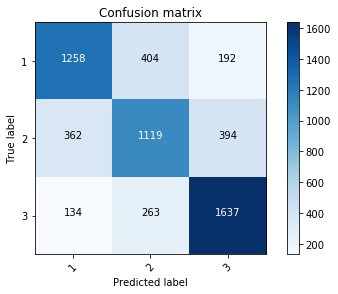


The accuracy score is 69.65%

10 Fold Cross Validation Scores for training data: 
[ 0.67  0.73  0.62  0.72  0.7   0.7   0.71  0.73  0.68  0.71]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.70 (+/- 0.06)

10 Fold Cross Validation Recall: 
[ 0.42  0.6   0.47  0.54  0.51  0.54  0.55  0.47  0.48  0.47]

Recall: 0.50 (+/- 0.10)

10 Fold Cross Validation Precision: 
[ 0.68  0.92  0.75  0.88  0.85  0.85  0.83  0.81  0.81  0.86]

Precision: 0.82 (+/- 0.13)


Testing results of logistic regression unigram tf idf

             precision    recall  f1-score   support

          1       0.75      0.70      0.72       480
          2       0.61      0.59      0.60       446
          3       0.74      0.81      0.77       515

avg / total       0.70      0.70      0.70      1441

Confusion matrix, without normalization
[[337  95  48]
 [ 85 262  99]
 [ 28  72 415]]


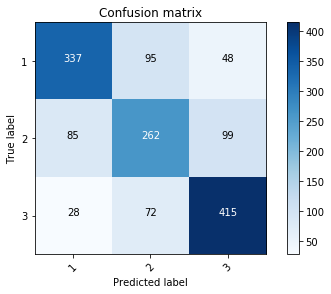


The accuracy score is 70.37%

--------------------------------------------------------------------
--------------------------------------------------------------------
Training results of logistic regression unigram Term occurance:

             precision    recall  f1-score   support

          1       0.74      0.74      0.74      1854
          2       0.65      0.65      0.65      1875
          3       0.81      0.82      0.81      2034

avg / total       0.74      0.74      0.74      5763

Confusion matrix, without normalization
[[1363  381  110]
 [ 379 1222  274]
 [ 107  267 1660]]


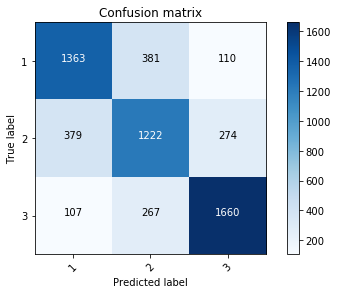


The accuracy score is 73.66%

10 Fold Cross Validation Scores for training data: 
[ 0.72  0.76  0.69  0.76  0.73  0.74  0.74  0.76  0.71  0.75]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.74 (+/- 0.04)

10 Fold Cross Validation Recall: 
[ 0.67  0.72  0.67  0.66  0.66  0.71  0.72  0.66  0.65  0.69]

Recall: 0.68 (+/- 0.05)

10 Fold Cross Validation Precision: 
[ 0.68  0.83  0.77  0.8   0.82  0.8   0.76  0.8   0.75  0.84]

Precision: 0.78 (+/- 0.09)


Testing results of logistic regression unigram Term occurance:

             precision    recall  f1-score   support

          1       0.78      0.77      0.77       480
          2       0.64      0.65      0.65       446
          3       0.84      0.83      0.83       515

avg / total       0.76      0.76      0.76      1441

Confusion matrix, without normalization
[[371  91  18]
 [ 92 291  63]
 [ 15  74 426]]


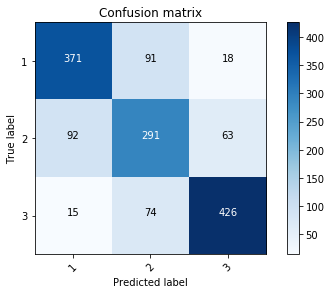


The accuracy score is 75.50%

--------------------------------------------------------------------
--------------------------------------------------------------------
Training results of logistic regression bigram tf idf:

             precision    recall  f1-score   support

          1       0.71      0.67      0.69      1854
          2       0.62      0.60      0.61      1875
          3       0.74      0.81      0.77      2034

avg / total       0.69      0.69      0.69      5763

Confusion matrix, without normalization
[[1233  430  191]
 [ 359 1126  390]
 [ 141  253 1640]]


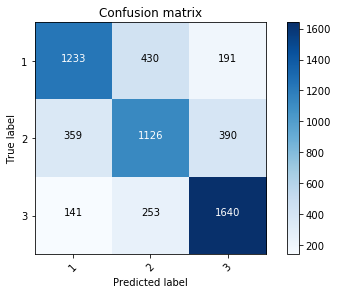


The accuracy score is 69.39%

10 Fold Cross Validation Scores for training data: 
[ 0.66  0.72  0.62  0.73  0.69  0.69  0.72  0.71  0.68  0.71]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.69 (+/- 0.06)

10 Fold Cross Validation Recall: 
[ 0.35  0.52  0.44  0.47  0.48  0.45  0.48  0.4   0.38  0.45]

Recall: 0.44 (+/- 0.09)

10 Fold Cross Validation Precision: 
[ 0.71  0.93  0.76  0.91  0.87  0.87  0.87  0.82  0.85  0.86]

Precision: 0.85 (+/- 0.13)


Testing results of logistic regression bigram tf idf

             precision    recall  f1-score   support

          1       0.76      0.68      0.72       480
          2       0.61      0.61      0.61       446
          3       0.73      0.80      0.77       515

avg / total       0.70      0.70      0.70      1441

Confusion matrix, without normalization
[[328  97  55]
 [ 79 271  96]
 [ 26  75 414]]


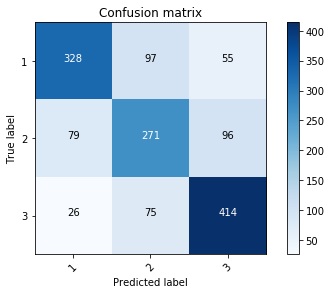


The accuracy score is 70.30%

--------------------------------------------------------------------
--------------------------------------------------------------------
Training results of logistic regression bigram Term occurance:

             precision    recall  f1-score   support

          1       0.74      0.73      0.74      1854
          2       0.64      0.66      0.65      1875
          3       0.81      0.80      0.81      2034

avg / total       0.73      0.73      0.73      5763

Confusion matrix, without normalization
[[1350  398  106]
 [ 357 1245  273]
 [ 112  294 1628]]


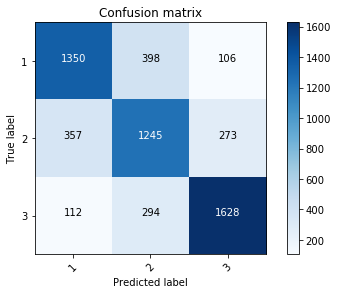


The accuracy score is 73.28%

10 Fold Cross Validation Scores for training data: 
[ 0.71  0.75  0.69  0.76  0.74  0.74  0.74  0.75  0.71  0.74]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.73 (+/- 0.05)

10 Fold Cross Validation Recall: 
[ 0.66  0.7   0.6   0.65  0.64  0.67  0.69  0.63  0.61  0.7 ]

Recall: 0.65 (+/- 0.07)

10 Fold Cross Validation Precision: 
[ 0.69  0.82  0.77  0.79  0.82  0.78  0.82  0.78  0.77  0.83]

Precision: 0.79 (+/- 0.08)


Testing results of logistic regression bigram Term occurance:

             precision    recall  f1-score   support

          1       0.78      0.78      0.78       480
          2       0.64      0.65      0.64       446
          3       0.83      0.81      0.82       515

avg / total       0.75      0.75      0.75      1441

Confusion matrix, without normalization
[[373  84  23]
 [ 92 290  64]
 [ 15  81 419]]


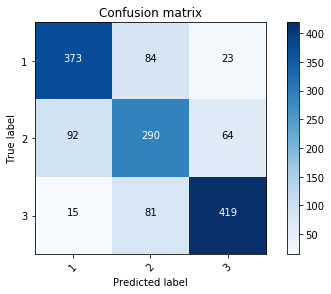


The accuracy score is 75.09%

--------------------------------------------------------------------
--------------------------------------------------------------------
Training results of logistic regression unigram+bigram tf idf:

             precision    recall  f1-score   support

          1       0.71      0.66      0.68      1854
          2       0.63      0.59      0.61      1875
          3       0.73      0.81      0.77      2034

avg / total       0.69      0.69      0.69      5763

Confusion matrix, without normalization
[[1231  417  206]
 [ 359 1105  411]
 [ 151  234 1649]]


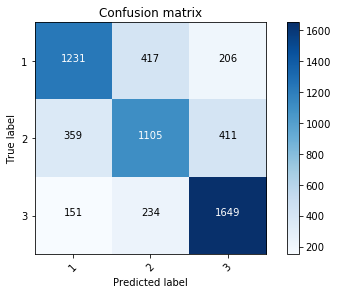


The accuracy score is 69.15%

10 Fold Cross Validation Scores for training data: 
[ 0.67  0.72  0.62  0.72  0.7   0.69  0.72  0.7   0.68  0.7 ]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.69 (+/- 0.06)

10 Fold Cross Validation Recall: 
[ 0.32  0.49  0.38  0.42  0.42  0.4   0.41  0.36  0.35  0.41]

Recall: 0.40 (+/- 0.09)

10 Fold Cross Validation Precision: 
[ 0.78  0.95  0.78  0.91  0.88  0.9   0.88  0.85  0.89  0.87]

Precision: 0.87 (+/- 0.10)


Testing results of logistic regression unigram+bigram tf idf

             precision    recall  f1-score   support

          1       0.76      0.70      0.73       480
          2       0.62      0.60      0.61       446
          3       0.73      0.80      0.76       515

avg / total       0.70      0.70      0.70      1441

Confusion matrix, without normalization
[[334  93  53]
 [ 76 267 103]
 [ 30  73 412]]


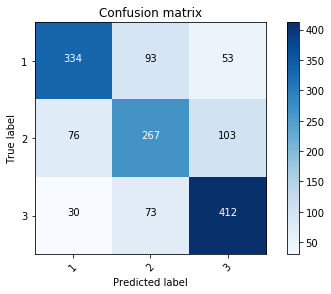


The accuracy score is 70.30%

--------------------------------------------------------------------
--------------------------------------------------------------------
Training results of logistic regression unigram+bigram Term occurance:

             precision    recall  f1-score   support

          1       0.74      0.71      0.73      1854
          2       0.63      0.67      0.65      1875
          3       0.80      0.79      0.80      2034

avg / total       0.73      0.73      0.73      5763

Confusion matrix, without normalization
[[1324  412  118]
 [ 347 1250  278]
 [ 113  311 1610]]


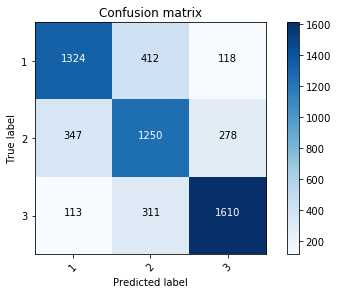


The accuracy score is 72.60%

10 Fold Cross Validation Scores for training data: 
[ 0.7   0.74  0.67  0.76  0.73  0.74  0.74  0.74  0.7   0.73]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.73 (+/- 0.05)

10 Fold Cross Validation Recall: 
[ 0.61  0.67  0.59  0.65  0.64  0.66  0.69  0.62  0.58  0.68]

Recall: 0.64 (+/- 0.07)

10 Fold Cross Validation Precision: 
[ 0.7   0.84  0.78  0.8   0.84  0.8   0.82  0.79  0.78  0.85]

Precision: 0.80 (+/- 0.08)


Testing results of logistic regression unigram+bigram Term occurance:

             precision    recall  f1-score   support

          1       0.78      0.77      0.78       480
          2       0.64      0.66      0.65       446
          3       0.83      0.82      0.82       515

avg / total       0.76      0.75      0.75      1441

Confusion matrix, without normalization
[[371  83  26]
 [ 88 295  63]
 [ 14  81 420]]


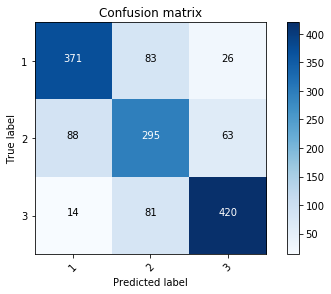


The accuracy score is 75.36%

--------------------------------------------------------------------
--------------------------------------------------------------------


In [22]:
def  Logistic():
    data,target = load_file()
    tfidf_data = preprocess_tfidf(1)
    data_train, data_test, target_train, target_test = train_test_split(tfidf_data, target, test_size=0.2, random_state=42)
    print("Training results of logistic regression unigram tf idf:")
    LogisticRegression_classifier = LogisticRegression()
    print()
    learn_model(data_train,target_train,LogisticRegression_classifier)
    print()
    print("Testing results of logistic regression unigram tf idf")
    print()
    predicted = LogisticRegression_classifier.fit(data_train,target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
    bow=preprocess_bow(1)
    data_train, data_test, target_train, target_test = train_test_split(bow, target, test_size=0.2, random_state=42)
    print("Training results of logistic regression unigram Term occurance:")
    LogisticRegression_classifier = LogisticRegression()
    print()
    learn_model(data_train,target_train,LogisticRegression_classifier)
    print()
    print("Testing results of logistic regression unigram Term occurance:")
    print()
    predicted = LogisticRegression_classifier.fit(data_train,target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
    data,target = load_file()
    tfidf_data = preprocess_tfidf(2)
    data_train, data_test, target_train, target_test = train_test_split(tfidf_data, target, test_size=0.2, random_state=42)
    print("Training results of logistic regression bigram tf idf:")
    LogisticRegression_classifier = LogisticRegression()
    print()
    learn_model(data_train,target_train,LogisticRegression_classifier)
    print()
    print("Testing results of logistic regression bigram tf idf")
    print()
    predicted = LogisticRegression_classifier.fit(data_train,target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
    bow=preprocess_bow(2)
    data_train, data_test, target_train, target_test = train_test_split(bow, target, test_size=0.2, random_state=42)
    print("Training results of logistic regression bigram Term occurance:")
    LogisticRegression_classifier = LogisticRegression()
    print()
    learn_model(data_train,target_train,LogisticRegression_classifier)
    print()
    print("Testing results of logistic regression bigram Term occurance:")
    print()
    predicted = LogisticRegression_classifier.fit(data_train,target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
    data,target = load_file()
    tfidf_data = preprocess_tfidf(1+2)
    data_train, data_test, target_train, target_test = train_test_split(tfidf_data, target, test_size=0.2, random_state=42)
    print("Training results of logistic regression unigram+bigram tf idf:")
    LogisticRegression_classifier = LogisticRegression()
    print()
    learn_model(data_train,target_train,LogisticRegression_classifier)
    print()
    print("Testing results of logistic regression unigram+bigram tf idf")
    print()
    predicted = LogisticRegression_classifier.fit(data_train,target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
    bow=preprocess_bow(1+2)
    data_train, data_test, target_train, target_test = train_test_split(bow, target, test_size=0.2, random_state=42)
    print("Training results of logistic regression unigram+bigram Term occurance:")
    LogisticRegression_classifier = LogisticRegression()
    print()
    learn_model(data_train,target_train,LogisticRegression_classifier)
    print()
    print("Testing results of logistic regression unigram+bigram Term occurance:")
    print()
    predicted = LogisticRegression_classifier.fit(data_train,target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
Logistic()

Training results of KNN k=1 unigram tf idf:

             precision    recall  f1-score   support

          1       0.78      0.63      0.70      1854
          2       0.52      0.76      0.62      1875
          3       0.85      0.64      0.73      2034

avg / total       0.72      0.68      0.69      5763

Confusion matrix, without normalization
[[1170  631   53]
 [ 268 1434  173]
 [  54  677 1303]]


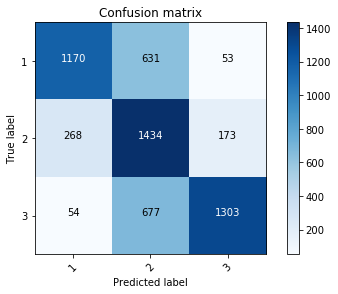


The accuracy score is 67.79%

10 Fold Cross Validation Scores for training data: 
[ 0.68  0.67  0.64  0.68  0.66  0.69  0.69  0.7   0.68  0.69]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.68 (+/- 0.03)

10 Fold Cross Validation Recall: 
[ 0.66  0.64  0.59  0.61  0.59  0.66  0.66  0.65  0.62  0.64]

Recall: 0.63 (+/- 0.05)

10 Fold Cross Validation Precision: 
[ 0.7   0.79  0.78  0.8   0.76  0.79  0.78  0.78  0.81  0.84]

Precision: 0.78 (+/- 0.07)


Testing results of KNN k=1 unigram tf-idf:

             precision    recall  f1-score   support

          1       0.78      0.71      0.75       480
          2       0.53      0.73      0.61       446
          3       0.88      0.68      0.76       515

avg / total       0.74      0.70      0.71      1441

Confusion matrix, without normalization
[[342 130   8]
 [ 83 324  39]
 [ 13 154 348]]


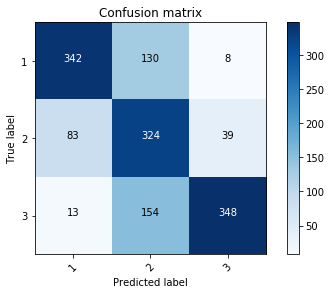


The accuracy score is 70.37%

--------------------------------------------------------------------
--------------------------------------------------------------------
Training results of KNN k=1 unigram Term occurance:

             precision    recall  f1-score   support

          1       0.76      0.63      0.69      1854
          2       0.52      0.77      0.62      1875
          3       0.85      0.61      0.71      2034

avg / total       0.71      0.67      0.67      5763

Confusion matrix, without normalization
[[1165  629   60]
 [ 278 1443  154]
 [  83  719 1232]]


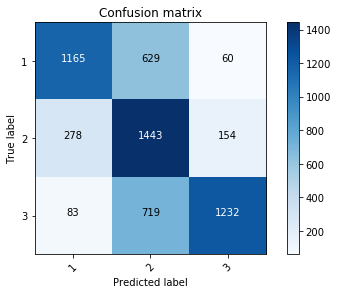


The accuracy score is 66.63%

10 Fold Cross Validation Scores for training data: 
[ 0.67  0.68  0.62  0.66  0.66  0.68  0.68  0.68  0.66  0.66]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.67 (+/- 0.03)

10 Fold Cross Validation Recall: 
[ 0.67  0.65  0.56  0.6   0.59  0.65  0.68  0.64  0.61  0.65]

Recall: 0.63 (+/- 0.07)

10 Fold Cross Validation Precision: 
[ 0.69  0.77  0.73  0.79  0.78  0.77  0.79  0.77  0.79  0.78]

Precision: 0.77 (+/- 0.06)


Testing results of KNN k=1 unigram Term occurance:

             precision    recall  f1-score   support

          1       0.77      0.70      0.73       480
          2       0.52      0.74      0.61       446
          3       0.88      0.62      0.73       515

avg / total       0.73      0.69      0.69      1441

Confusion matrix, without normalization
[[336 135   9]
 [ 81 331  34]
 [ 20 174 321]]


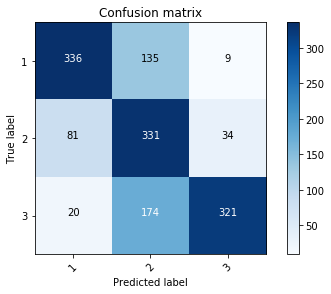


The accuracy score is 68.56%

--------------------------------------------------------------------
--------------------------------------------------------------------
Training results of KNN k=1 bigram tf idf:

             precision    recall  f1-score   support

          1       0.79      0.58      0.67      1854
          2       0.48      0.79      0.60      1875
          3       0.85      0.55      0.67      2034

avg / total       0.71      0.64      0.65      5763

Confusion matrix, without normalization
[[1075  732   47]
 [ 243 1485  147]
 [  51  864 1119]]


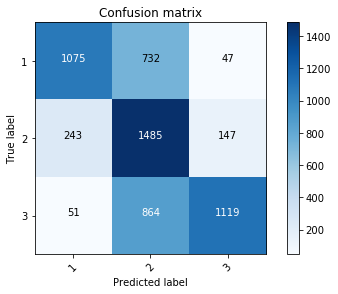


The accuracy score is 63.84%

10 Fold Cross Validation Scores for training data: 
[ 0.64  0.63  0.61  0.63  0.63  0.66  0.64  0.66  0.62  0.65]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.64 (+/- 0.03)

10 Fold Cross Validation Recall: 
[ 0.61  0.57  0.54  0.56  0.57  0.61  0.58  0.6   0.55  0.61]

Recall: 0.58 (+/- 0.05)

10 Fold Cross Validation Precision: 
[ 0.72  0.79  0.79  0.78  0.79  0.79  0.75  0.81  0.8   0.84]

Precision: 0.79 (+/- 0.06)


Testing results of KNN k=1 bigram tf-idf:

             precision    recall  f1-score   support

          1       0.79      0.66      0.72       480
          2       0.48      0.77      0.59       446
          3       0.89      0.57      0.70       515

avg / total       0.73      0.66      0.67      1441

Confusion matrix, without normalization
[[318 156   6]
 [ 74 342  30]
 [ 12 209 294]]


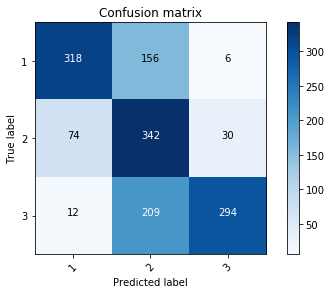


The accuracy score is 66.20%

--------------------------------------------------------------------
--------------------------------------------------------------------
Training results of KNN k=1 bigram Term occurance:

             precision    recall  f1-score   support

          1       0.78      0.54      0.64      1854
          2       0.46      0.81      0.59      1875
          3       0.86      0.50      0.63      2034

avg / total       0.70      0.61      0.62      5763

Confusion matrix, without normalization
[[ 999  808   47]
 [ 229 1524  122]
 [  55  970 1009]]


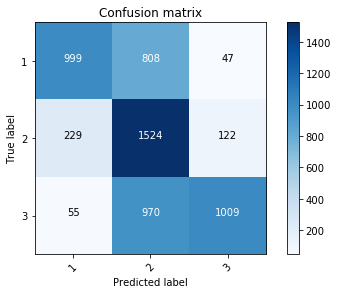


The accuracy score is 61.29%

10 Fold Cross Validation Scores for training data: 
[ 0.62  0.62  0.57  0.62  0.6   0.62  0.6   0.64  0.61  0.63]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.61 (+/- 0.04)

10 Fold Cross Validation Recall: 
[ 0.58  0.55  0.44  0.55  0.53  0.56  0.55  0.55  0.52  0.57]

Recall: 0.54 (+/- 0.07)

10 Fold Cross Validation Precision: 
[ 0.71  0.79  0.75  0.78  0.79  0.79  0.76  0.82  0.81  0.8 ]

Precision: 0.78 (+/- 0.06)


Testing results of KNN k=1 bigram Term occurance:

             precision    recall  f1-score   support

          1       0.79      0.61      0.69       480
          2       0.46      0.79      0.58       446
          3       0.88      0.51      0.65       515

avg / total       0.72      0.63      0.64      1441

Confusion matrix, without normalization
[[291 181   8]
 [ 64 354  28]
 [ 13 237 265]]


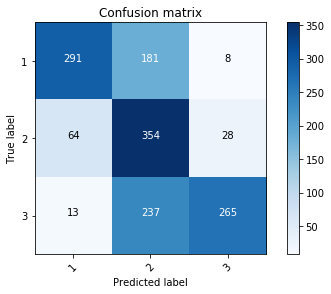


The accuracy score is 63.15%

--------------------------------------------------------------------
--------------------------------------------------------------------
Training results of KNN k=1 unigram+bigram tf idf:

             precision    recall  f1-score   support

          1       0.78      0.44      0.56      1854
          2       0.41      0.85      0.56      1875
          3       0.85      0.37      0.52      2034

avg / total       0.69      0.55      0.54      5763

Confusion matrix, without normalization
[[ 807 1010   37]
 [ 185 1590  100]
 [  37 1239  758]]


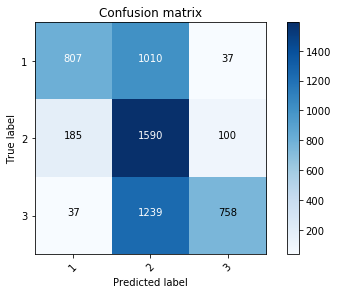


The accuracy score is 54.75%

10 Fold Cross Validation Scores for training data: 
[ 0.54  0.55  0.52  0.55  0.54  0.56  0.55  0.55  0.53  0.58]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.55 (+/- 0.03)

10 Fold Cross Validation Recall: 
[ 0.46  0.42  0.38  0.44  0.42  0.46  0.48  0.43  0.43  0.44]

Recall: 0.44 (+/- 0.05)

10 Fold Cross Validation Precision: 
[ 0.72  0.77  0.76  0.78  0.79  0.8   0.78  0.82  0.78  0.84]

Precision: 0.79 (+/- 0.07)


Testing results of KNN k=1 unigram+bigram tf-idf:

             precision    recall  f1-score   support

          1       0.79      0.52      0.63       480
          2       0.41      0.83      0.55       446
          3       0.89      0.37      0.53       515

avg / total       0.71      0.56      0.57      1441

Confusion matrix, without normalization
[[248 226   6]
 [ 57 371  18]
 [  8 315 192]]


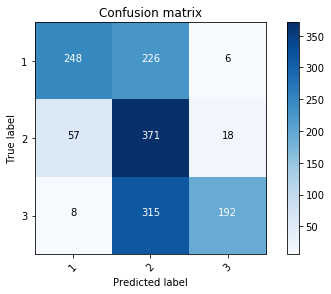


The accuracy score is 56.28%

--------------------------------------------------------------------
--------------------------------------------------------------------
Training results of KNN k=1 unigram+bigram Term occurance:

             precision    recall  f1-score   support

          1       0.77      0.46      0.57      1854
          2       0.43      0.84      0.57      1875
          3       0.86      0.40      0.54      2034

avg / total       0.69      0.56      0.56      5763

Confusion matrix, without normalization
[[ 848  967   39]
 [ 194 1583   98]
 [  58 1165  811]]


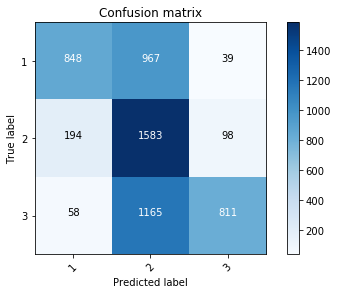


The accuracy score is 56.26%

10 Fold Cross Validation Scores for training data: 
[ 0.57  0.54  0.52  0.57  0.56  0.58  0.55  0.57  0.57  0.59]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.56 (+/- 0.04)

10 Fold Cross Validation Recall: 
[ 0.49  0.45  0.39  0.48  0.47  0.46  0.46  0.42  0.47  0.48]

Recall: 0.46 (+/- 0.06)

10 Fold Cross Validation Precision: 
[ 0.73  0.75  0.72  0.76  0.8   0.81  0.75  0.79  0.8   0.81]

Precision: 0.77 (+/- 0.06)


Testing results of KNN k=1 unigram+bigram Term occurance:

             precision    recall  f1-score   support

          1       0.78      0.53      0.63       480
          2       0.42      0.82      0.56       446
          3       0.89      0.43      0.58       515

avg / total       0.71      0.59      0.59      1441

Confusion matrix, without normalization
[[255 218   7]
 [ 58 366  22]
 [ 13 278 224]]


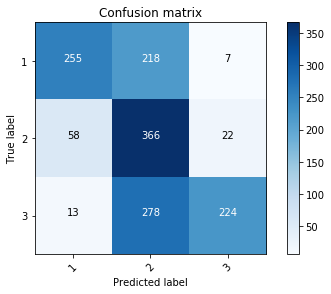


The accuracy score is 58.64%

--------------------------------------------------------------------
--------------------------------------------------------------------


In [23]:
def  KNN():
    data,target = load_file()
    tfidf_data = preprocess_tfidf(1)
    data_train, data_test, target_train, target_test = train_test_split(tfidf_data, target, test_size=0.2, random_state=42)
    print("Training results of KNN k=1 unigram tf idf:")
    KNN_classifier1K = KNeighborsClassifier(n_neighbors=1)                       
    print()
    learn_model(data_train,target_train,KNN_classifier1K)
    print()
    print("Testing results of KNN k=1 unigram tf-idf:")
    print()
    predicted = KNN_classifier1K.fit(data_train,target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
    bow=preprocess_bow(1)
    data_train, data_test, target_train, target_test = train_test_split(bow, target, test_size=0.2, random_state=42)
    print("Training results of KNN k=1 unigram Term occurance:")
    KNN_classifier1K = KNeighborsClassifier(n_neighbors=1)                       
    print()
    learn_model(data_train,target_train,KNN_classifier1K)
    print()
    print("Testing results of KNN k=1 unigram Term occurance:")
    print()
    predicted = KNN_classifier1K.fit(data_train,target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------") 
    data,target = load_file()
    tfidf_data = preprocess_tfidf(2)
    data_train, data_test, target_train, target_test = train_test_split(tfidf_data, target, test_size=0.2, random_state=42)
    print("Training results of KNN k=1 bigram tf idf:")
    KNN_classifier1K = KNeighborsClassifier(n_neighbors=1)                       
    print()
    learn_model(data_train,target_train,KNN_classifier1K)
    print()
    print("Testing results of KNN k=1 bigram tf-idf:")
    print()
    predicted = KNN_classifier1K.fit(data_train,target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
    bow=preprocess_bow(2)
    data_train, data_test, target_train, target_test = train_test_split(bow, target, test_size=0.2, random_state=42)
    print("Training results of KNN k=1 bigram Term occurance:")
    KNN_classifier1K = KNeighborsClassifier(n_neighbors=1)                       
    print()
    learn_model(data_train,target_train,KNN_classifier1K)
    print()
    print("Testing results of KNN k=1 bigram Term occurance:")
    print()
    predicted = KNN_classifier1K.fit(data_train,target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------") 
    data,target = load_file()
    tfidf_data = preprocess_tfidf(1+2)
    data_train, data_test, target_train, target_test = train_test_split(tfidf_data, target, test_size=0.2, random_state=42)
    print("Training results of KNN k=1 unigram+bigram tf idf:")
    KNN_classifier1K = KNeighborsClassifier(n_neighbors=1)                       
    print()
    learn_model(data_train,target_train,KNN_classifier1K)
    print()
    print("Testing results of KNN k=1 unigram+bigram tf-idf:")
    print()
    predicted = KNN_classifier1K.fit(data_train,target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
    bow=preprocess_bow(1+2)
    data_train, data_test, target_train, target_test = train_test_split(bow, target, test_size=0.2, random_state=42)
    print("Training results of KNN k=1 unigram+bigram Term occurance:")
    KNN_classifier1K = KNeighborsClassifier(n_neighbors=1)                       
    print()
    learn_model(data_train,target_train,KNN_classifier1K)
    print()
    print("Testing results of KNN k=1 unigram+bigram Term occurance:")
    print()
    predicted = KNN_classifier1K.fit(data_train,target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------") 
KNN()

Training results of unigram tf idf LogisticRegression with L2 penalty, Regularization Parameter C:100

             precision    recall  f1-score   support

          1       0.74      0.74      0.74      1854
          2       0.65      0.66      0.66      1875
          3       0.83      0.80      0.81      2034

avg / total       0.74      0.74      0.74      5763

Confusion matrix, without normalization
[[1381  379   94]
 [ 385 1240  250]
 [ 109  291 1634]]


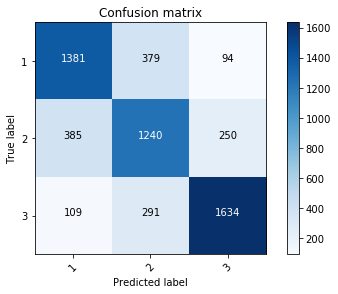


The accuracy score is 73.83%

10 Fold Cross Validation Scores for training data: 
[ 0.7   0.76  0.71  0.76  0.73  0.75  0.74  0.74  0.73  0.75]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.74 (+/- 0.04)

10 Fold Cross Validation Recall: 
[ 0.73  0.75  0.71  0.72  0.68  0.75  0.76  0.72  0.68  0.75]

Recall: 0.72 (+/- 0.05)

10 Fold Cross Validation Precision: 
[ 0.65  0.75  0.74  0.77  0.76  0.76  0.75  0.76  0.75  0.81]

Precision: 0.75 (+/- 0.08)


Testing results of unigram tf idf LogisticRegression with L2 penalty, Regularization Parameter C:100

             precision    recall  f1-score   support

          1       0.76      0.78      0.77       480
          2       0.62      0.63      0.63       446
          3       0.84      0.82      0.83       515

avg / total       0.75      0.75      0.75      1441

Confusion matrix, without normalization
[[375  90  15]
 [100 280  66]
 [ 16  78 421]]


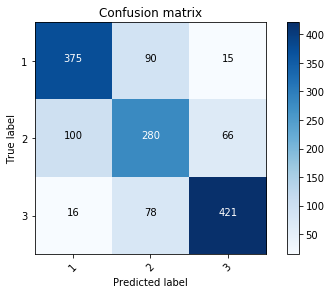


The accuracy score is 74.67%

--------------------------------------------------------------------
--------------------------------------------------------------------
Training results unigram Term occurance LogisticRegression with L2 penalty, Regularization Parameter C:1

             precision    recall  f1-score   support

          1       0.74      0.74      0.74      1854
          2       0.65      0.65      0.65      1875
          3       0.81      0.82      0.81      2034

avg / total       0.74      0.74      0.74      5763

Confusion matrix, without normalization
[[1363  381  110]
 [ 379 1222  274]
 [ 107  267 1660]]


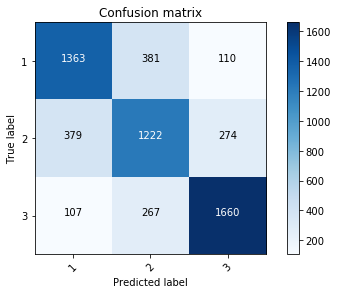


The accuracy score is 73.66%

10 Fold Cross Validation Scores for training data: 
[ 0.72  0.76  0.69  0.76  0.73  0.74  0.74  0.76  0.71  0.75]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.74 (+/- 0.04)

10 Fold Cross Validation Recall: 
[ 0.67  0.72  0.67  0.66  0.66  0.71  0.72  0.66  0.65  0.69]

Recall: 0.68 (+/- 0.05)

10 Fold Cross Validation Precision: 
[ 0.68  0.83  0.77  0.8   0.82  0.8   0.76  0.8   0.75  0.84]

Precision: 0.78 (+/- 0.09)


Testing results unigram Term occurance LogisticRegression with L2 penalty, Regularization Parameter C:1

             precision    recall  f1-score   support

          1       0.78      0.77      0.77       480
          2       0.64      0.65      0.65       446
          3       0.84      0.83      0.83       515

avg / total       0.76      0.76      0.76      1441

Confusion matrix, without normalization
[[371  91  18]
 [ 92 291  63]
 [ 15  74 426]]


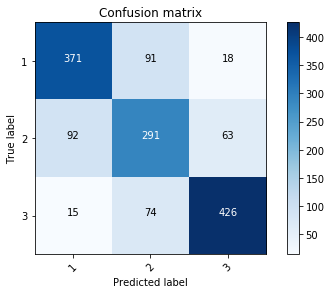


The accuracy score is 75.50%

--------------------------------------------------------------------
--------------------------------------------------------------------
Training results of bigram tf idf with LogisticRegression with L2 penalty, Regularization Parameter C:100

             precision    recall  f1-score   support

          1       0.74      0.73      0.73      1854
          2       0.65      0.66      0.65      1875
          3       0.81      0.81      0.81      2034

avg / total       0.73      0.73      0.73      5763

Confusion matrix, without normalization
[[1351  387  116]
 [ 364 1229  282]
 [ 108  280 1646]]


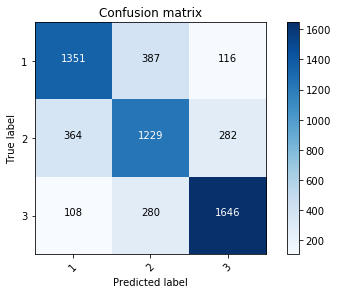


The accuracy score is 73.33%

10 Fold Cross Validation Scores for training data: 
[ 0.7   0.75  0.7   0.76  0.73  0.76  0.74  0.74  0.71  0.73]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.73 (+/- 0.04)

10 Fold Cross Validation Recall: 
[ 0.66  0.72  0.63  0.68  0.68  0.72  0.72  0.68  0.61  0.71]

Recall: 0.68 (+/- 0.07)

10 Fold Cross Validation Precision: 
[ 0.66  0.8   0.76  0.79  0.76  0.82  0.8   0.79  0.76  0.83]

Precision: 0.78 (+/- 0.09)


Testing results of bigram tf idf LogisticRegression with L2 penalty, Regularization Parameter C:100

             precision    recall  f1-score   support

          1       0.77      0.79      0.78       480
          2       0.64      0.64      0.64       446
          3       0.83      0.82      0.82       515

avg / total       0.75      0.75      0.75      1441

Confusion matrix, without normalization
[[379  81  20]
 [ 96 284  66]
 [ 15  79 421]]


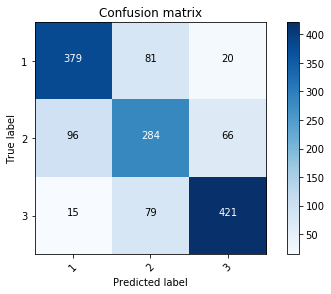


The accuracy score is 75.23%

--------------------------------------------------------------------
--------------------------------------------------------------------
Training results of bigram term occurance with LogisticRegression with L2 penalty, Regularization Parameter C:1

             precision    recall  f1-score   support

          1       0.74      0.73      0.74      1854
          2       0.64      0.66      0.65      1875
          3       0.81      0.80      0.81      2034

avg / total       0.73      0.73      0.73      5763

Confusion matrix, without normalization
[[1350  398  106]
 [ 357 1245  273]
 [ 112  294 1628]]


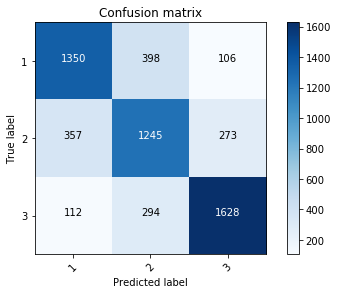


The accuracy score is 73.28%

10 Fold Cross Validation Scores for training data: 
[ 0.71  0.75  0.69  0.76  0.74  0.74  0.74  0.75  0.71  0.74]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.73 (+/- 0.05)

10 Fold Cross Validation Recall: 
[ 0.66  0.7   0.6   0.65  0.64  0.67  0.69  0.63  0.61  0.7 ]

Recall: 0.65 (+/- 0.07)

10 Fold Cross Validation Precision: 
[ 0.69  0.82  0.77  0.79  0.82  0.78  0.82  0.78  0.77  0.83]

Precision: 0.79 (+/- 0.08)


Testing results of bigram term occurance with LogisticRegression with L2 penalty, Regularization Parameter C:1

             precision    recall  f1-score   support

          1       0.78      0.78      0.78       480
          2       0.64      0.65      0.64       446
          3       0.83      0.81      0.82       515

avg / total       0.75      0.75      0.75      1441

Confusion matrix, without normalization
[[373  84  23]
 [ 92 290  64]
 [ 15  81 419]]


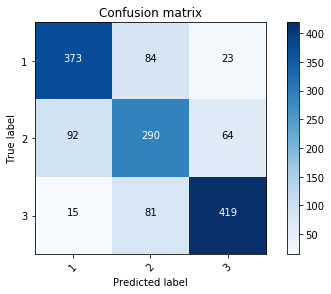


The accuracy score is 75.09%

--------------------------------------------------------------------
--------------------------------------------------------------------
Training results of unigram+bigram tf idf LogisticRegression with L2 penalty, Regularization Parameter C:100

             precision    recall  f1-score   support

          1       0.74      0.72      0.73      1854
          2       0.64      0.65      0.65      1875
          3       0.80      0.81      0.80      2034

avg / total       0.73      0.73      0.73      5763

Confusion matrix, without normalization
[[1333  399  122]
 [ 356 1218  301]
 [ 107  284 1643]]


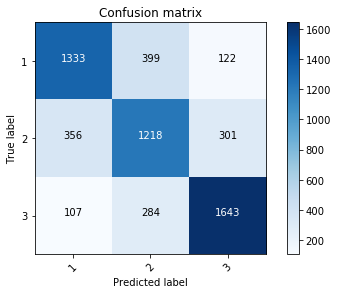


The accuracy score is 72.77%

10 Fold Cross Validation Scores for training data: 
[ 0.69  0.74  0.69  0.77  0.72  0.75  0.74  0.74  0.71  0.73]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.73 (+/- 0.05)

10 Fold Cross Validation Recall: 
[ 0.63  0.68  0.6   0.67  0.65  0.7   0.71  0.61  0.59  0.71]

Recall: 0.66 (+/- 0.09)

10 Fold Cross Validation Precision: 
[ 0.68  0.81  0.78  0.8   0.81  0.8   0.82  0.78  0.77  0.85]

Precision: 0.79 (+/- 0.08)


Testing results of unigram+bigram  tf idf LogisticRegression with L2 penalty, Regularization Parameter C:100

             precision    recall  f1-score   support

          1       0.78      0.78      0.78       480
          2       0.64      0.63      0.64       446
          3       0.82      0.82      0.82       515

avg / total       0.75      0.75      0.75      1441

Confusion matrix, without normalization
[[376  79  25]
 [ 93 283  70]
 [ 15  77 423]]


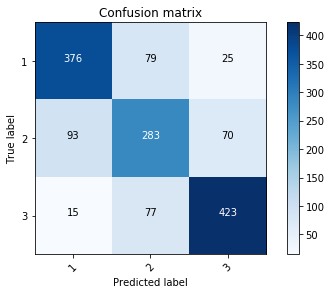


The accuracy score is 75.09%

--------------------------------------------------------------------
--------------------------------------------------------------------
Training results unigram+bigram  Term occurance LogisticRegression with L2 penalty, Regularization Parameter C:1

             precision    recall  f1-score   support

          1       0.74      0.71      0.73      1854
          2       0.63      0.67      0.65      1875
          3       0.80      0.79      0.80      2034

avg / total       0.73      0.73      0.73      5763

Confusion matrix, without normalization
[[1324  412  118]
 [ 347 1250  278]
 [ 113  311 1610]]


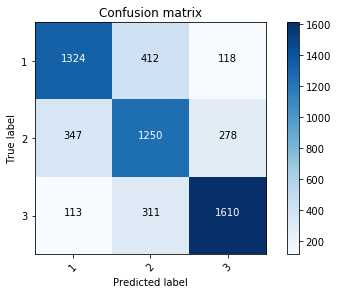


The accuracy score is 72.60%

10 Fold Cross Validation Scores for training data: 
[ 0.7   0.74  0.67  0.76  0.73  0.74  0.74  0.74  0.7   0.73]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.73 (+/- 0.05)

10 Fold Cross Validation Recall: 
[ 0.61  0.67  0.59  0.65  0.64  0.66  0.69  0.62  0.58  0.68]

Recall: 0.64 (+/- 0.07)

10 Fold Cross Validation Precision: 
[ 0.7   0.84  0.78  0.8   0.84  0.8   0.82  0.79  0.78  0.85]

Precision: 0.80 (+/- 0.08)


Testing results unigram+bigram  Term occurance LogisticRegression with L2 penalty, Regularization Parameter C:1

             precision    recall  f1-score   support

          1       0.78      0.77      0.78       480
          2       0.64      0.66      0.65       446
          3       0.83      0.82      0.82       515

avg / total       0.76      0.75      0.75      1441

Confusion matrix, without normalization
[[371  83  26]
 [ 88 295  63]
 [ 14  81 420]]


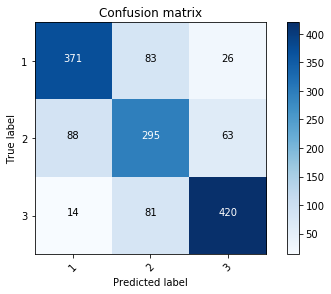


The accuracy score is 75.36%

--------------------------------------------------------------------
--------------------------------------------------------------------


In [ ]:
def  Logistic():
    data,target = load_file()
    tfidf_data = preprocess_tfidf(1)
    data_train, data_test, target_train, target_test = train_test_split(tfidf_data, target, test_size=0.2, random_state=42)
    print("Training results of unigram tf idf LogisticRegression with L2 penalty, Regularization Parameter C:100")
    classifier_l2_LR = LogisticRegression(C=100, penalty='l2', n_jobs=-1)
    print()
    learn_model(data_train,target_train,classifier_l2_LR)
    print()
    print("Testing results of unigram tf idf LogisticRegression with L2 penalty, Regularization Parameter C:100")
    print()
    predicted = classifier_l2_LR.fit(data_train,target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
    bow=preprocess_bow(1)
    data_train, data_test, target_train, target_test = train_test_split(bow, target, test_size=0.2, random_state=42)
    print("Training results unigram Term occurance LogisticRegression with L2 penalty, Regularization Parameter C:1")
    classifier_l2_LR = LogisticRegression(C=1, penalty='l2', n_jobs=-1)
    print()
    learn_model(data_train,target_train,classifier_l2_LR)
    print()
    print("Testing results unigram Term occurance LogisticRegression with L2 penalty, Regularization Parameter C:1")
    print()
    predicted = classifier_l2_LR.fit(data_train,target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
    data,target = load_file()
    tfidf_data = preprocess_tfidf(2)
    data_train, data_test, target_train, target_test = train_test_split(tfidf_data, target, test_size=0.2, random_state=42)
    print("Training results of bigram tf idf with LogisticRegression with L2 penalty, Regularization Parameter C:100")
    classifier_l2_LR = LogisticRegression(C=100, penalty='l2', n_jobs=-1)
    print()
    learn_model(data_train,target_train,classifier_l2_LR)
    print()
    print("Testing results of bigram tf idf LogisticRegression with L2 penalty, Regularization Parameter C:100")
    print()
    predicted = classifier_l2_LR.fit(data_train,target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
    bow=preprocess_bow(2)
    data_train, data_test, target_train, target_test = train_test_split(bow, target, test_size=0.2, random_state=42)
    print("Training results of bigram term occurance with LogisticRegression with L2 penalty, Regularization Parameter C:1")
    classifier_l2_LR = LogisticRegression(C=1, penalty='l2', n_jobs=-1)
    print()
    learn_model(data_train,target_train,classifier_l2_LR)
    print()
    print("Testing results of bigram term occurance with LogisticRegression with L2 penalty, Regularization Parameter C:1")
    print()
    predicted = classifier_l2_LR.fit(data_train,target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
    data,target = load_file()
    tfidf_data = preprocess_tfidf(1+2)
    data_train, data_test, target_train, target_test = train_test_split(tfidf_data, target, test_size=0.2, random_state=42)
    print("Training results of unigram+bigram tf idf LogisticRegression with L2 penalty, Regularization Parameter C:100")
    classifier_l2_LR = LogisticRegression(C=100, penalty='l2', n_jobs=-1)
    print()
    learn_model(data_train,target_train,classifier_l2_LR)
    print()
    print("Testing results of unigram+bigram  tf idf LogisticRegression with L2 penalty, Regularization Parameter C:100")
    print()
    predicted = classifier_l2_LR.fit(data_train,target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
    bow=preprocess_bow(1+2)
    data_train, data_test, target_train, target_test = train_test_split(bow, target, test_size=0.2, random_state=42)
    print("Training results unigram+bigram  Term occurance LogisticRegression with L2 penalty, Regularization Parameter C:1")
    classifier_l2_LR = LogisticRegression(C=1, penalty='l2', n_jobs=-1)
    print()
    learn_model(data_train,target_train,classifier_l2_LR)
    print()
    print("Testing results unigram+bigram  Term occurance LogisticRegression with L2 penalty, Regularization Parameter C:1")
    print()
    predicted = classifier_l2_LR.fit(data_train,target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
Logistic()

Training results of SVM linear unigram tf idf C=1:

             precision    recall  f1-score   support

          1       0.73      0.68      0.70      1854
          2       0.64      0.65      0.64      1875
          3       0.78      0.81      0.80      2034

avg / total       0.72      0.72      0.72      5763

Confusion matrix, without normalization
[[1266  438  150]
 [ 347 1211  317]
 [ 125  257 1652]]


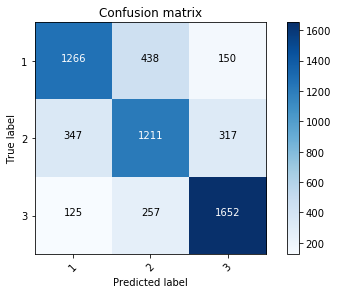


The accuracy score is 71.65%

10 Fold Cross Validation Scores for training data: 
[ 0.69  0.75  0.65  0.74  0.73  0.71  0.74  0.74  0.69  0.73]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.72 (+/- 0.06)

10 Fold Cross Validation Recall: 
[ 0.56  0.63  0.58  0.63  0.62  0.63  0.63  0.56  0.53  0.63]

Recall: 0.60 (+/- 0.07)

10 Fold Cross Validation Precision: 
[ 0.69  0.85  0.77  0.83  0.84  0.8   0.8   0.76  0.77  0.85]

Precision: 0.79 (+/- 0.10)


Testing results of SVM linear unigram tf-idf  C=1:

             precision    recall  f1-score   support

          1       0.77      0.73      0.75       480
          2       0.61      0.62      0.61       446
          3       0.78      0.81      0.79       515

avg / total       0.72      0.72      0.72      1441

Confusion matrix, without normalization
[[349  96  35]
 [ 88 275  83]
 [ 19  80 416]]


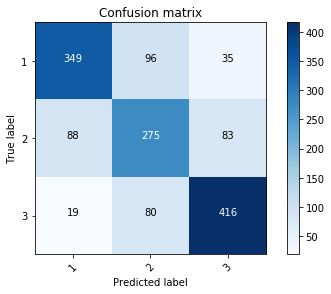


The accuracy score is 72.17%

--------------------------------------------------------------------
--------------------------------------------------------------------
Training results of SVM linear unigram Term occurance  C=0.1:

             precision    recall  f1-score   support

          1       0.74      0.67      0.70      1854
          2       0.61      0.68      0.64      1875
          3       0.79      0.78      0.79      2034

avg / total       0.72      0.71      0.71      5763

Confusion matrix, without normalization
[[1241  489  124]
 [ 312 1278  285]
 [ 127  328 1579]]


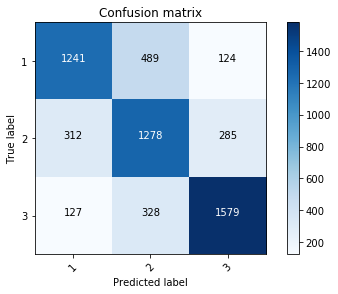


The accuracy score is 71.11%

10 Fold Cross Validation Scores for training data: 
[ 0.69  0.73  0.66  0.73  0.71  0.72  0.73  0.74  0.69  0.71]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.71 (+/- 0.05)

10 Fold Cross Validation Recall: 
[ 0.55  0.62  0.56  0.59  0.58  0.61  0.63  0.57  0.53  0.58]

Recall: 0.58 (+/- 0.06)

10 Fold Cross Validation Precision: 
[ 0.71  0.84  0.76  0.81  0.83  0.79  0.8   0.81  0.76  0.84]

Precision: 0.79 (+/- 0.08)


Testing results of SVM linear unigram Term occurance  C=0.1:

             precision    recall  f1-score   support

          1       0.79      0.72      0.75       480
          2       0.60      0.67      0.64       446
          3       0.81      0.80      0.80       515

avg / total       0.74      0.73      0.74      1441

Confusion matrix, without normalization
[[346 108  26]
 [ 78 300  68]
 [ 15  90 410]]


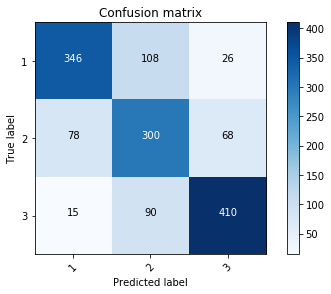


The accuracy score is 73.28%

--------------------------------------------------------------------
--------------------------------------------------------------------
Training results of SVM linear bigram tf idf  C=1:

             precision    recall  f1-score   support

          1       0.75      0.69      0.72      1854
          2       0.63      0.67      0.65      1875
          3       0.79      0.81      0.80      2034

avg / total       0.73      0.73      0.73      5763

Confusion matrix, without normalization
[[1279  445  130]
 [ 315 1248  312]
 [ 108  273 1653]]


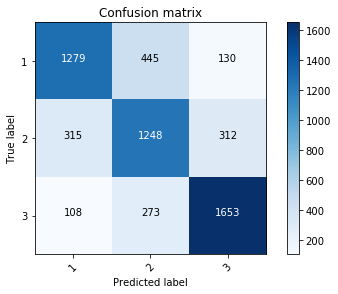


The accuracy score is 72.53%

10 Fold Cross Validation Scores for training data: 
[ 0.71  0.75  0.67  0.75  0.73  0.73  0.74  0.73  0.7   0.75]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.73 (+/- 0.05)

10 Fold Cross Validation Recall: 
[ 0.58  0.66  0.55  0.61  0.64  0.64  0.68  0.58  0.56  0.66]

Recall: 0.62 (+/- 0.09)

10 Fold Cross Validation Precision: 
[ 0.72  0.87  0.77  0.83  0.87  0.83  0.84  0.79  0.79  0.86]

Precision: 0.82 (+/- 0.09)


Testing results of SVM linear bigram tf-idf  C=1:

             precision    recall  f1-score   support

          1       0.79      0.74      0.76       480
          2       0.63      0.65      0.64       446
          3       0.80      0.82      0.81       515

avg / total       0.74      0.74      0.74      1441

Confusion matrix, without normalization
[[356  92  32]
 [ 82 288  76]
 [ 14  77 424]]


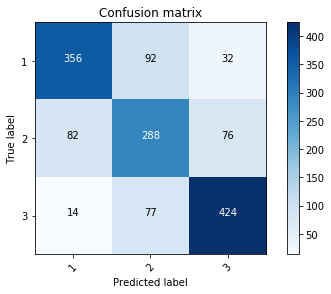


The accuracy score is 74.12%

--------------------------------------------------------------------
--------------------------------------------------------------------
Training results of SVM linear bigram Term occurance C=0.1:

             precision    recall  f1-score   support

          1       0.75      0.71      0.73      1854
          2       0.62      0.69      0.66      1875
          3       0.82      0.78      0.80      2034

avg / total       0.73      0.73      0.73      5763

Confusion matrix, without normalization
[[1316  443   95]
 [ 325 1301  249]
 [ 110  342 1582]]


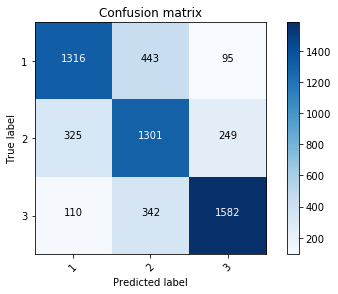


The accuracy score is 72.86%

10 Fold Cross Validation Scores for training data: 
[ 0.71  0.75  0.69  0.75  0.74  0.73  0.73  0.76  0.7   0.74]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.73 (+/- 0.05)

10 Fold Cross Validation Recall: 
[ 0.66  0.67  0.62  0.67  0.66  0.68  0.69  0.66  0.62  0.66]

Recall: 0.66 (+/- 0.04)

10 Fold Cross Validation Precision: 
[ 0.7   0.82  0.78  0.78  0.79  0.78  0.8   0.81  0.78  0.85]

Precision: 0.79 (+/- 0.07)


Testing results of SVM linear bigram Term occurance C=0.1:

             precision    recall  f1-score   support

          1       0.79      0.76      0.77       480
          2       0.62      0.69      0.65       446
          3       0.85      0.81      0.83       515

avg / total       0.76      0.75      0.76      1441

Confusion matrix, without normalization
[[363 101  16]
 [ 82 308  56]
 [ 13  87 415]]


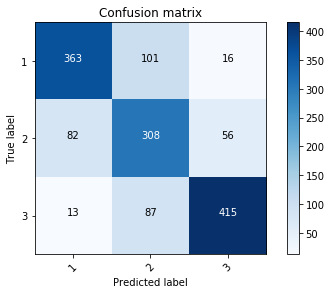


The accuracy score is 75.36%

--------------------------------------------------------------------
--------------------------------------------------------------------
Training results of SVM linear unigram+bigram tf idf  C=10:

             precision    recall  f1-score   support

          1       0.75      0.69      0.72      1854
          2       0.63      0.66      0.65      1875
          3       0.79      0.81      0.80      2034

avg / total       0.72      0.72      0.72      5763

Confusion matrix, without normalization
[[1276  446  132]
 [ 311 1245  319]
 [ 113  274 1647]]


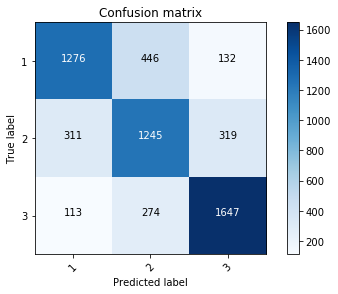


The accuracy score is 72.32%

10 Fold Cross Validation Scores for training data: 
[ 0.71  0.74  0.66  0.75  0.73  0.72  0.74  0.73  0.7   0.75]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.72 (+/- 0.05)

10 Fold Cross Validation Recall: 
[ 0.58  0.65  0.54  0.6   0.63  0.63  0.65  0.56  0.54  0.65]

Recall: 0.60 (+/- 0.09)

10 Fold Cross Validation Precision: 
[ 0.74  0.88  0.78  0.83  0.87  0.86  0.83  0.79  0.77  0.86]

Precision: 0.82 (+/- 0.09)


Testing results of SVM linear unigram+bigram tf-idf  C=1:

             precision    recall  f1-score   support

          1       0.79      0.74      0.77       480
          2       0.63      0.64      0.64       446
          3       0.79      0.83      0.81       515

avg / total       0.74      0.74      0.74      1441

Confusion matrix, without normalization
[[356  94  30]
 [ 79 287  80]
 [ 13  76 426]]


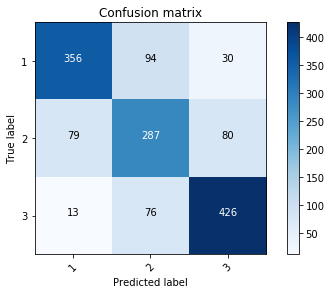


The accuracy score is 74.18%

--------------------------------------------------------------------
--------------------------------------------------------------------
Training results of SVM linear unigram+bigram Term occurance C=0.1:

             precision    recall  f1-score   support

          1       0.75      0.70      0.73      1854
          2       0.62      0.70      0.66      1875
          3       0.82      0.77      0.80      2034

avg / total       0.73      0.73      0.73      5763

Confusion matrix, without normalization
[[1306  449   99]
 [ 327 1311  237]
 [ 109  361 1564]]


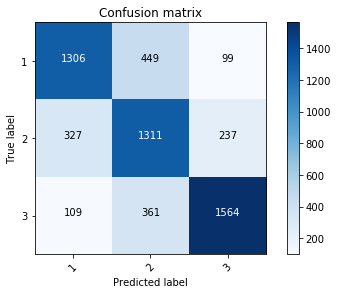


The accuracy score is 72.55%

10 Fold Cross Validation Scores for training data: 
[ 0.71  0.73  0.68  0.75  0.74  0.73  0.73  0.75  0.7   0.74]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.73 (+/- 0.04)

10 Fold Cross Validation Recall: 
[ 0.66  0.68  0.62  0.66  0.64  0.68  0.69  0.65  0.58  0.69]

Recall: 0.65 (+/- 0.06)

10 Fold Cross Validation Precision: 
[ 0.72  0.8   0.77  0.78  0.77  0.79  0.81  0.81  0.77  0.85]

Precision: 0.79 (+/- 0.06)


Testing results of SVM linear unigram+bigram Term occurance C=0.1:

             precision    recall  f1-score   support

          1       0.79      0.77      0.78       480
          2       0.62      0.69      0.65       446
          3       0.85      0.79      0.82       515

avg / total       0.76      0.75      0.75      1441

Confusion matrix, without normalization
[[368  97  15]
 [ 82 308  56]
 [ 13  95 407]]


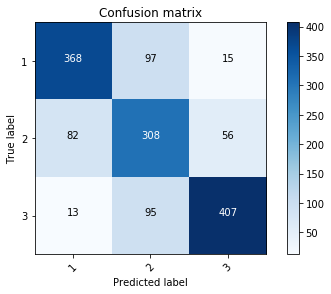


The accuracy score is 75.16%

--------------------------------------------------------------------
--------------------------------------------------------------------


In [ ]:
def SVC_Linear():
    data,target = load_file()
    tfidf_data = preprocess_tfidf(1)
    data_train, data_test, target_train, target_test = train_test_split(tfidf_data, target, test_size=0.2, random_state=42)
    print("Training results of SVM linear unigram tf idf C=1:")
    SVC_classifier_linearKernel = SVC(C=1, kernel='linear')
    print()
    learn_model(data_train,target_train,SVC_classifier_linearKernel)
    print()
    print("Testing results of SVM linear unigram tf-idf  C=1:")
    print()
    predicted = SVC_classifier_linearKernel.fit(data_train,target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
    bow=preprocess_bow(1)
    data_train, data_test, target_train, target_test = train_test_split(bow, target, test_size=0.2, random_state=42)
    print("Training results of SVM linear unigram Term occurance  C=0.1:")
    SVC_classifier_linearKernel = SVC(C=0.1, kernel='linear')
    print()
    learn_model(data_train,target_train,SVC_classifier_linearKernel)
    print()
    print("Testing results of SVM linear unigram Term occurance  C=0.1:")
    print()
    predicted = SVC_classifier_linearKernel.fit(data_train,target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
    data,target = load_file()
    tfidf_data = preprocess_tfidf(2)
    data_train, data_test, target_train, target_test = train_test_split(tfidf_data, target, test_size=0.2, random_state=42)
    print("Training results of SVM linear bigram tf idf  C=1:")
    SVC_classifier_linearKernel = SVC(C=1, kernel='linear')
    print()
    learn_model(data_train,target_train,SVC_classifier_linearKernel)
    print()
    print("Testing results of SVM linear bigram tf-idf  C=1:")
    print()
    predicted = SVC_classifier_linearKernel.fit(data_train,target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
    bow=preprocess_bow(2)
    data_train, data_test, target_train, target_test = train_test_split(bow, target, test_size=0.2, random_state=42)
    print("Training results of SVM linear bigram Term occurance C=0.1:")
    SVC_classifier_linearKernel = SVC(C=0.1, kernel='linear')
    print()
    learn_model(data_train,target_train,SVC_classifier_linearKernel)
    print()
    print("Testing results of SVM linear bigram Term occurance C=0.1:")
    print()
    predicted = SVC_classifier_linearKernel.fit(data_train,target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------") 
    data,target = load_file()
    tfidf_data = preprocess_tfidf(1+2)
    data_train, data_test, target_train, target_test = train_test_split(tfidf_data, target, test_size=0.2, random_state=42)
    print("Training results of SVM linear unigram+bigram tf idf  C=10:")
    SVC_classifier_linearKernel = SVC(C=1, kernel='linear')
    print()
    learn_model(data_train,target_train,SVC_classifier_linearKernel)
    print()
    print("Testing results of SVM linear unigram+bigram tf-idf  C=1:")
    print()
    predicted = SVC_classifier_linearKernel.fit(data_train,target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
    bow=preprocess_bow(1+2)
    data_train, data_test, target_train, target_test = train_test_split(bow, target, test_size=0.2, random_state=42)
    print("Training results of SVM linear unigram+bigram Term occurance C=0.1:")
    SVC_classifier_linearKernel = SVC(C=0.1, kernel='linear')
    print()
    learn_model(data_train,target_train,SVC_classifier_linearKernel)
    print()
    print("Testing results of SVM linear unigram+bigram Term occurance C=0.1:")
    print()
    predicted = SVC_classifier_linearKernel.fit(data_train,target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------") 
SVC_Linear()

Training results of unigram tf idf SVM RBF kernel with C=10, gamma=1

             precision    recall  f1-score   support

          1       0.76      0.73      0.75      1854
          2       0.66      0.68      0.67      1875
          3       0.82      0.82      0.82      2034

avg / total       0.75      0.75      0.75      5763

Confusion matrix, without normalization
[[1362  392  100]
 [ 337 1275  263]
 [  99  274 1661]]


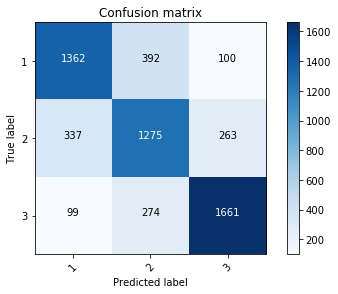


The accuracy score is 74.58%

10 Fold Cross Validation Scores for training data: 
[ 0.72  0.77  0.71  0.76  0.74  0.76  0.74  0.76  0.73  0.75]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.75 (+/- 0.04)

10 Fold Cross Validation Recall: 
[ 0.69  0.73  0.69  0.68  0.69  0.75  0.72  0.7   0.65  0.73]

Recall: 0.70 (+/- 0.05)

10 Fold Cross Validation Precision: 
[ 0.68  0.8   0.77  0.8   0.81  0.8   0.77  0.79  0.8   0.83]

Precision: 0.78 (+/- 0.07)


Testing results of unigram tf idf SVM RBF kernel with C=10, gamma=1

             precision    recall  f1-score   support

          1       0.79      0.79      0.79       480
          2       0.64      0.65      0.65       446
          3       0.83      0.82      0.83       515

avg / total       0.76      0.76      0.76      1441

Confusion matrix, without normalization
[[378  88  14]
 [ 85 291  70]
 [ 18  75 422]]


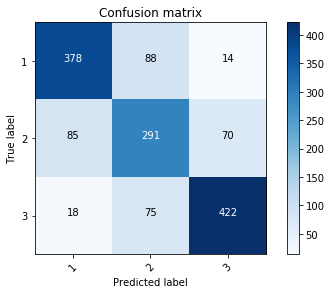


The accuracy score is 75.71%

--------------------------------------------------------------------
--------------------------------------------------------------------
Training results of unigram term occurance SVM RBF kernel with C=10, gamma=0.01

             precision    recall  f1-score   support

          1       0.74      0.72      0.73      1854
          2       0.63      0.69      0.66      1875
          3       0.82      0.78      0.80      2034

avg / total       0.74      0.73      0.73      5763

Confusion matrix, without normalization
[[1333  424   97]
 [ 338 1288  249]
 [ 123  321 1590]]


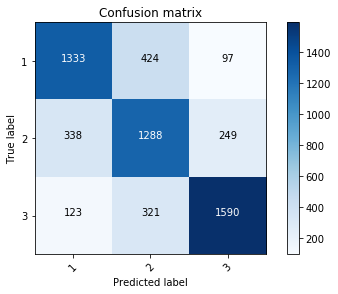


The accuracy score is 73.07%

10 Fold Cross Validation Scores for training data: 
[ 0.71  0.76  0.68  0.75  0.75  0.73  0.74  0.76  0.7   0.73]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.73 (+/- 0.05)

10 Fold Cross Validation Recall: 
[ 0.65  0.69  0.65  0.66  0.66  0.68  0.71  0.62  0.61  0.69]

Recall: 0.66 (+/- 0.06)

10 Fold Cross Validation Precision: 
[ 0.68  0.84  0.79  0.8   0.81  0.77  0.78  0.79  0.76  0.84]

Precision: 0.79 (+/- 0.09)


Testing results of unigram  term occurance SVM RBF kernel with C=10, gamma=0.01

             precision    recall  f1-score   support

          1       0.80      0.77      0.78       480
          2       0.64      0.69      0.66       446
          3       0.85      0.82      0.83       515

avg / total       0.77      0.76      0.76      1441

Confusion matrix, without normalization
[[369  96  15]
 [ 79 308  59]
 [ 14  81 420]]


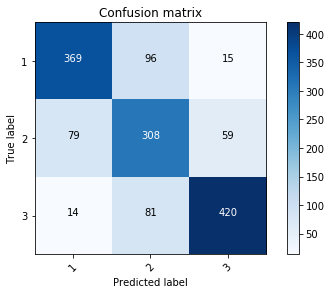


The accuracy score is 76.13%

--------------------------------------------------------------------
--------------------------------------------------------------------
Training results of bigram tf idf SVM RBF kernel with C=10, gamma=1

             precision    recall  f1-score   support

          1       0.75      0.72      0.74      1854
          2       0.65      0.67      0.66      1875
          3       0.80      0.82      0.81      2034

avg / total       0.74      0.74      0.74      5763

Confusion matrix, without normalization
[[1332  408  114]
 [ 330 1253  292]
 [ 103  271 1660]]


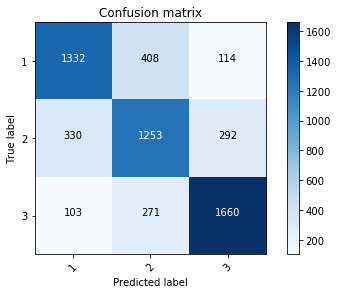


The accuracy score is 73.66%

10 Fold Cross Validation Scores for training data: 
[ 0.71  0.77  0.7   0.75  0.73  0.75  0.73  0.75  0.73  0.75]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.74 (+/- 0.04)

10 Fold Cross Validation Recall: 
[ 0.65  0.69  0.61  0.67  0.63  0.71  0.69  0.64  0.61  0.69]

Recall: 0.66 (+/- 0.07)

10 Fold Cross Validation Precision: 
[ 0.71  0.83  0.79  0.81  0.82  0.82  0.81  0.8   0.8   0.85]

Precision: 0.80 (+/- 0.07)


Testing results of bigram tf idf SVM RBF kernel with C=10, gamma=1

             precision    recall  f1-score   support

          1       0.79      0.77      0.78       480
          2       0.64      0.64      0.64       446
          3       0.81      0.83      0.82       515

avg / total       0.75      0.75      0.75      1441

Confusion matrix, without normalization
[[371  84  25]
 [ 84 287  75]
 [ 13  75 427]]


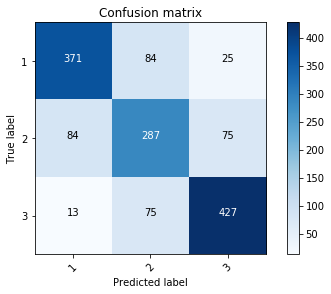


The accuracy score is 75.29%

--------------------------------------------------------------------
--------------------------------------------------------------------
Training results of bigram term occurance SVM RBF kernel with C=10, gamma=0.01

             precision    recall  f1-score   support

          1       0.75      0.71      0.73      1854
          2       0.63      0.69      0.66      1875
          3       0.82      0.79      0.80      2034

avg / total       0.73      0.73      0.73      5763

Confusion matrix, without normalization
[[1321  429  104]
 [ 332 1289  254]
 [ 113  321 1600]]


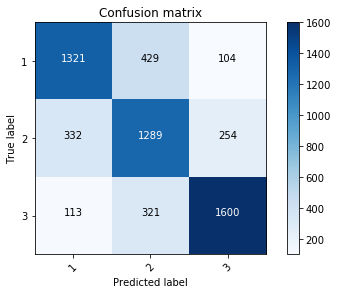


The accuracy score is 73.05%

10 Fold Cross Validation Scores for training data: 
[ 0.7   0.74  0.69  0.75  0.74  0.74  0.73  0.75  0.71  0.75]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.73 (+/- 0.04)

10 Fold Cross Validation Recall: 
[ 0.68  0.7   0.65  0.66  0.68  0.7   0.72  0.68  0.61  0.71]

Recall: 0.68 (+/- 0.06)

10 Fold Cross Validation Precision: 
[ 0.69  0.79  0.79  0.76  0.76  0.78  0.79  0.81  0.77  0.85]

Precision: 0.78 (+/- 0.08)


Testing results of bigram  term occurance SVM RBF kernel with C=10, gamma=0.01

             precision    recall  f1-score   support

          1       0.78      0.77      0.77       480
          2       0.62      0.67      0.65       446
          3       0.85      0.80      0.83       515

avg / total       0.76      0.75      0.75      1441

Confusion matrix, without normalization
[[369  95  16]
 [ 90 299  57]
 [ 16  86 413]]


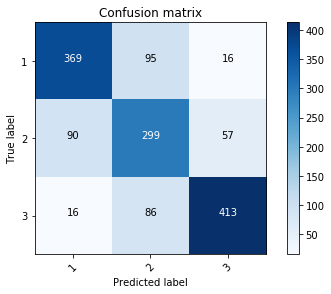


The accuracy score is 75.02%

--------------------------------------------------------------------
--------------------------------------------------------------------
Training results of unigram+bigram tf idf SVM RBF kernel with C=10, gamma=1

             precision    recall  f1-score   support

          1       0.75      0.70      0.73      1854
          2       0.64      0.65      0.64      1875
          3       0.78      0.81      0.80      2034

avg / total       0.72      0.72      0.72      5763

Confusion matrix, without normalization
[[1304  416  134]
 [ 329 1222  324]
 [ 107  281 1646]]


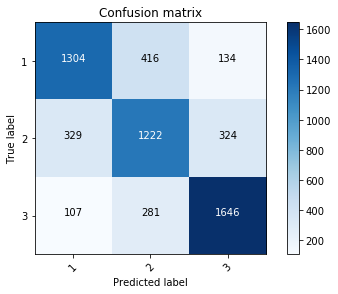


The accuracy score is 72.39%

10 Fold Cross Validation Scores for training data: 
[ 0.7   0.74  0.68  0.75  0.72  0.74  0.73  0.73  0.71  0.74]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.72 (+/- 0.04)

10 Fold Cross Validation Recall: 
[ 0.59  0.62  0.58  0.61  0.58  0.64  0.64  0.55  0.56  0.65]

Recall: 0.60 (+/- 0.07)

10 Fold Cross Validation Precision: 
[ 0.74  0.84  0.8   0.82  0.87  0.83  0.84  0.79  0.79  0.86]

Precision: 0.82 (+/- 0.08)


Testing results of unigram+bigram tf idf SVM RBF kernel with C=10, gamma=1

             precision    recall  f1-score   support

          1       0.80      0.76      0.78       480
          2       0.64      0.65      0.64       446
          3       0.79      0.82      0.81       515

avg / total       0.75      0.75      0.75      1441

Confusion matrix, without normalization
[[366  83  31]
 [ 80 288  78]
 [ 14  79 422]]


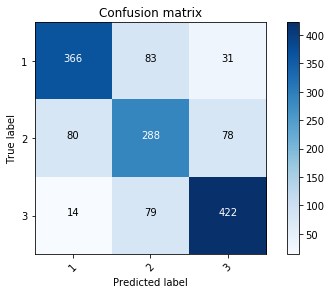


The accuracy score is 74.67%

--------------------------------------------------------------------
--------------------------------------------------------------------
Training results of bigram term occurance SVM RBF kernel with C=10, gamma=0.01

             precision    recall  f1-score   support

          1       0.74      0.71      0.72      1854
          2       0.63      0.67      0.65      1875
          3       0.80      0.78      0.79      2034

avg / total       0.73      0.72      0.72      5763

Confusion matrix, without normalization
[[1309  423  122]
 [ 340 1263  272]
 [ 116  324 1594]]


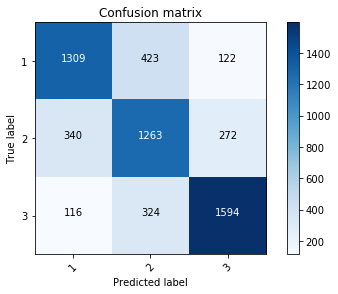


The accuracy score is 72.29%

10 Fold Cross Validation Scores for training data: 
[ 0.7   0.75  0.67  0.75  0.72  0.74  0.72  0.74  0.7   0.73]

The mean score and the 95% confidence interval of the score estimate are given by:
Accuracy: 0.72 (+/- 0.05)

10 Fold Cross Validation Recall: 
[ 0.67  0.7   0.62  0.66  0.65  0.7   0.69  0.64  0.58  0.68]

Recall: 0.66 (+/- 0.07)

10 Fold Cross Validation Precision: 
[ 0.73  0.81  0.78  0.77  0.8   0.8   0.81  0.78  0.78  0.85]

Precision: 0.79 (+/- 0.06)


Testing results of bigram  term occurance SVM RBF kernel with C=10, gamma=0.01

             precision    recall  f1-score   support

          1       0.78      0.76      0.77       480
          2       0.62      0.67      0.64       446
          3       0.83      0.80      0.82       515

avg / total       0.75      0.75      0.75      1441

Confusion matrix, without normalization
[[363  96  21]
 [ 88 297  61]
 [ 15  86 414]]


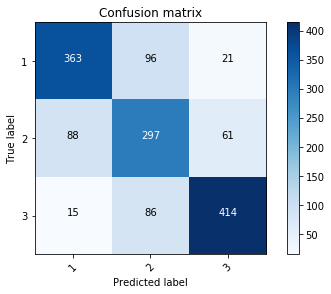


The accuracy score is 74.53%

--------------------------------------------------------------------
--------------------------------------------------------------------


In [10]:
def SVC_RBF():
    data,target = load_file()
    tfidf_data = preprocess_tfidf(1)
    data_train, data_test, target_train, target_test = train_test_split(tfidf_data, target, test_size=0.2, random_state=42)
    print("Training results of unigram tf idf SVM RBF kernel with C=10, gamma=1")
    SVC_classifier_rbfKernel = SVC(C=10,gamma=1, kernel='rbf')
    print()
    learn_model(data_train,target_train,SVC_classifier_rbfKernel)
    print()
    print("Testing results of unigram tf idf SVM RBF kernel with C=10, gamma=1")
    print()
    predicted = SVC_classifier_rbfKernel.fit(data_train, target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
    bow=preprocess_bow(1)
    data_train, data_test, target_train, target_test = train_test_split(bow, target, test_size=0.2, random_state=42)
    print("Training results of unigram term occurance SVM RBF kernel with C=10, gamma=0.01")
    SVC_classifier_rbfKernel = SVC(C=10,gamma=0.01, kernel='rbf')
    print()
    learn_model(data_train,target_train,SVC_classifier_rbfKernel)
    print()
    print("Testing results of unigram  term occurance SVM RBF kernel with C=10, gamma=0.01")
    print()
    predicted = SVC_classifier_rbfKernel.fit(data_train, target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
    data,target = load_file()
    tfidf_data = preprocess_tfidf(2)
    data_train, data_test, target_train, target_test = train_test_split(tfidf_data, target, test_size=0.2, random_state=42)
    print("Training results of bigram tf idf SVM RBF kernel with C=10, gamma=1")
    SVC_classifier_rbfKernel = SVC(C=10,gamma=1, kernel='rbf')
    print()
    learn_model(data_train,target_train,SVC_classifier_rbfKernel)
    print()
    print("Testing results of bigram tf idf SVM RBF kernel with C=10, gamma=1")
    print()
    predicted = SVC_classifier_rbfKernel.fit(data_train, target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
    bow=preprocess_bow(2)
    data_train, data_test, target_train, target_test = train_test_split(bow, target, test_size=0.2, random_state=42)
    print("Training results of bigram term occurance SVM RBF kernel with C=10, gamma=0.01")
    SVC_classifier_rbfKernel = SVC(C=10,gamma=0.01, kernel='rbf')
    print()
    learn_model(data_train,target_train,SVC_classifier_rbfKernel)
    print()
    print("Testing results of bigram  term occurance SVM RBF kernel with C=10, gamma=0.01")
    print()
    predicted = SVC_classifier_rbfKernel.fit(data_train, target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
    data,target = load_file()
    tfidf_data = preprocess_tfidf(1+2)
    data_train, data_test, target_train, target_test = train_test_split(tfidf_data, target, test_size=0.2, random_state=42)
    print("Training results of unigram+bigram tf idf SVM RBF kernel with C=10, gamma=1")
    SVC_classifier_rbfKernel = SVC(C=10,gamma=1, kernel='rbf')
    print()
    learn_model(data_train,target_train,SVC_classifier_rbfKernel)
    print()
    print("Testing results of unigram+bigram tf idf SVM RBF kernel with C=10, gamma=1")
    print()
    predicted = SVC_classifier_rbfKernel.fit(data_train, target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
    bow=preprocess_bow(1+2)
    data_train, data_test, target_train, target_test = train_test_split(bow, target, test_size=0.2, random_state=42)
    print("Training results of bigram term occurance SVM RBF kernel with C=10, gamma=0.01")
    SVC_classifier_rbfKernel = SVC(C=10,gamma=0.01, kernel='rbf')
    print()
    learn_model(data_train,target_train,SVC_classifier_rbfKernel)
    print()
    print("Testing results of bigram  term occurance SVM RBF kernel with C=10, gamma=0.01")
    print()
    predicted = SVC_classifier_rbfKernel.fit(data_train, target_train).predict(data_test)
    #print(classification_report(target_test,predicted))
    evaluate_model(target_test,predicted)
    print("--------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
SVC_RBF()